In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Projects/wind_speed_forecasting/implementation1_univariate_single_step

/content/drive/MyDrive/Projects/wind_speed_forecasting/implementation1_univariate_single_step


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence.iloc[i:end_ix], sequence.iloc[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
n_steps = 4 #4 weeks as input

In [ ]:
df=pd.read_csv('Rajasthan2.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,Wind Speed
0,3.147576
1,3.226448
2,1.910139
3,3.159724
4,3.435311
...,...
5470,2.446395
5471,1.120289
5472,1.904124
5473,1.675611


In [ ]:
df_rj1=pd.DataFrame(columns=['Wind Speed'])

In [ ]:
for i in range(int(len(df)/7)):
  sum=0.0
  for j in range(7):
    if j>int(len(df)):
      break
    sum+=df['Wind Speed'].iloc[i+j]
  sum=sum/7
  df_rj1=df_rj1.append({'Wind Speed': sum}, ignore_index=True)

In [ ]:
df_rj1

,Wind Speed
0,2.933092
1,2.766003
2,2.683979
3,2.736255
4,2.464121
...,...
777,2.489588
778,2.355418
779,2.305836
780,2.372696


In [ ]:
df_rj1_train=df_rj1[0:520]
df_rj1_test=df_rj1[520:]

In [ ]:
X, y = split_sequence(df_rj1_train, n_steps)

In [ ]:
X.shape

(516, 4, 1)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 6ms/step - loss: 8.3863
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 4.6686
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 1.1204
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6946
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4643
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3407
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2668
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2229
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2088
Epoch 10/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2072
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2059
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2049
Epoch 13/100
17/17 [=================

In [ ]:
def get_metrics(X,y):
  size=X.shape[0]
  mse=0.0
  mae=0.0
  mape=0.0
  for i in range(size):
    yhat = model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0)
    mse+=(yhat-y[i])*(yhat-y[i])
    mae+=abs((yhat-y[i]))
    mape+=abs((y[i]-yhat)/y[i])
  
  mse=mse/size
  mae=mae/size
  mape=mape/size
  print("MSE= ",mse)
  print("MAPE= ",mae)
  print("MAPE= ",mape)

In [ ]:
get_metrics(X,y)

MSE=  [[0.05537127]]
MAPE=  [[0.19131828]]
MAPE=  [[0.07102837]]


In [ ]:
print(len(x))
print(y.shape)

782
(516, 1)


In [ ]:
size=X.shape[0]
yhat=np.zeros(size)
for i in range(size):
  yhat[i]=(model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0))

In [ ]:
print(yhat[0].shape)

(1, 1)


In [ ]:
yhat.shape

(516,)

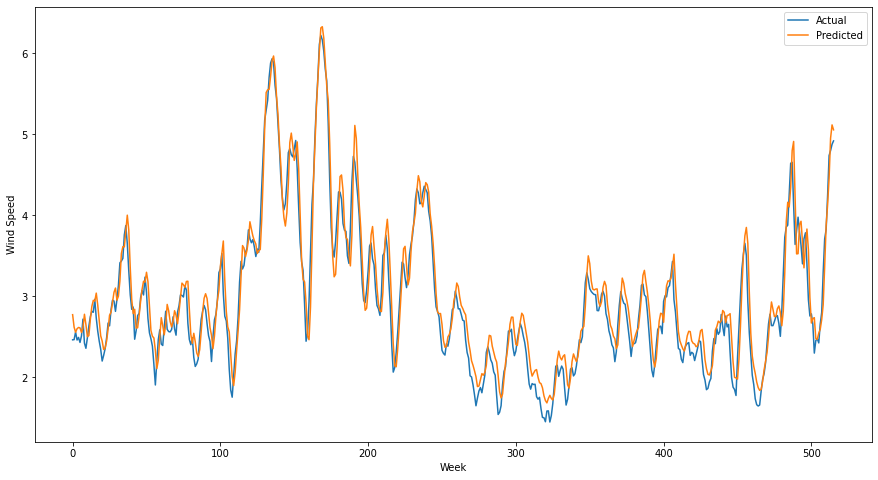

In [ ]:
# x axis values
x = list(range(516))
plt.figure(figsize=(15, 8))
plt.plot(x, y,label='Actual')

plt.xlabel('Week')
plt.ylabel('Wind Speed')

plt.plot(x,yhat,label='Predicted')
plt.legend(loc="upper right")
from matplotlib.pyplot import figure


plt.show()

In [ ]:
X, y = split_sequence(df_rj1_test, n_steps)

In [ ]:
get_metrics(X,y)

MSE=  [[0.01908849]]
MAPE=  [[0.10774211]]
MAPE=  [[0.03934306]]


In [ ]:
print(X[1],y[1])
print(model.predict(X[1].reshape((1, n_steps, n_features)),verbose=0))

[[4.9259159 ]
 [4.57050451]
 [4.2170311 ]
 [4.06206466]] [3.89500374]
[[3.9524944]]


In [ ]:
import matplotlib.pyplot as plt

For Rajasthan2

In [ ]:
df=pd.read_csv('Rajasthan2.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,Wind Speed
0,2.981399
1,3.200646
2,3.281240
3,3.219543
4,2.868555
...,...
5470,2.482506
5471,1.691885
5472,1.598947
5473,1.365050


In [ ]:
df_rj1=pd.DataFrame(columns=['Wind Speed'])

In [ ]:
for i in range(int(len(df)/7)):
  sum=0.0
  for j in range(7):
    if j>int(len(df)):
      break
    sum+=df['Wind Speed'].iloc[i+j]
  sum=sum/7
  df_rj1=df_rj1.append({'Wind Speed': sum}, ignore_index=True)

In [ ]:
df_rj1

,Wind Speed
0,2.898174
1,2.692179
2,2.528197
3,2.433620
4,2.409127
...,...
777,2.799798
778,2.784766
779,2.799074
780,2.619620


In [ ]:
df_rj1_train=df_rj1[0:520]
df_rj1_test=df_rj1[520:]

In [ ]:
X, y = split_sequence(df_rj1_train, n_steps)

In [ ]:
X.shape

(516, 4, 1)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 7ms/step - loss: 7.0353
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 5.3680
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 1.7212
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7058
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5426
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3975
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2743
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1842
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1272
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1125
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1175
Epoch 12/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1357
Epoch 13/100
17/17 [=================

In [ ]:
def get_metrics(X,y):
  size=X.shape[0]
  mse=0.0
  mae=0.0
  mape=0.0
  for i in range(size):
    yhat = model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0)
    mse+=(yhat-y[i])*(yhat-y[i])
    mae+=abs((yhat-y[i]))
    mape+=abs((y[i]-yhat)/y[i])
  
  mse=mse/size
  mae=mae/size
  mape=mape/size
  print("MSE= ",mse)
  print("MAPE= ",mae)
  print("MAPE= ",mape)

In [ ]:
get_metrics(X,y)

MSE=  [[0.03479665]]
MAPE=  [[0.14717665]]
MAPE=  [[0.0578114]]


In [ ]:
print(len(x))
print(y.shape)

516
(516, 1)


In [ ]:
size=X.shape[0]
yhat=np.zeros(size)
for i in range(size):
  yhat[i]=(model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0))

In [ ]:
print(yhat[0].shape)

()


In [ ]:
yhat.shape

(516,)

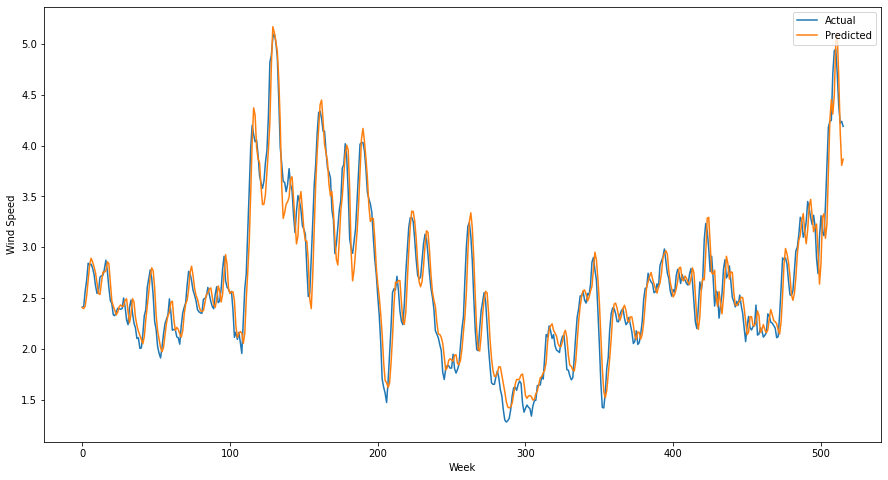

In [ ]:
# x axis values
x = list(range(516))
plt.figure(figsize=(15, 8))
plt.plot(x, y,label='Actual')

plt.xlabel('Week')
plt.ylabel('Wind Speed')

plt.plot(x,yhat,label='Predicted')
plt.legend(loc="upper right")
from matplotlib.pyplot import figure


plt.show()

In [ ]:
X, y = split_sequence(df_rj1_test, n_steps)

In [ ]:
get_metrics(X,y)

MSE=  [[0.04320576]]
MAPE=  [[0.16280768]]
MAPE=  [[0.06737359]]


In [ ]:
print(X[1],y[1])
print(model.predict(X[1].reshape((1, n_steps, n_features)),verbose=0))

[[3.75101175]
 [3.62371511]
 [3.70262093]
 [3.78593902]] [3.81221831]
[[3.6918879]]


In [ ]:
import matplotlib.pyplot as plt

For Rajasthan3

In [ ]:
df=pd.read_csv('Rajasthan3.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,Wind Speed
0,1.899589
1,2.017345
2,1.965550
3,2.110519
4,3.011898
...,...
5470,2.369528
5471,1.901246
5472,2.024929
5473,1.607879


In [ ]:
df_rj1=pd.DataFrame(columns=['Wind Speed'])

In [ ]:
for i in range(int(len(df)/7)):
  sum=0.0
  for j in range(7):
    if j>int(len(df)):
      break
    sum+=df['Wind Speed'].iloc[i+j]
  sum=sum/7
  df_rj1=df_rj1.append({'Wind Speed': sum}, ignore_index=True)

In [ ]:
df_rj1

,Wind Speed
0,2.492706
1,2.608172
2,2.659979
3,2.788557
4,2.807839
...,...
777,2.838889
778,2.854370
779,2.885293
780,2.726699


In [ ]:
df_rj1_train=df_rj1[0:520]
df_rj1_test=df_rj1[520:]

In [ ]:
X, y = split_sequence(df_rj1_train, n_steps)

In [ ]:
X.shape

(516, 4, 1)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 6ms/step - loss: 6.9170
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 4.3293
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.8742
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4881
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3351
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2611
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2072
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1891
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1653
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1501
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1433
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1415
Epoch 13/100
17/17 [=================

In [ ]:
def get_metrics(X,y):
  size=X.shape[0]
  mse=0.0
  mae=0.0
  mape=0.0
  for i in range(size):
    yhat = model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0)
    mse+=(yhat-y[i])*(yhat-y[i])
    mae+=abs((yhat-y[i]))
    mape+=abs((y[i]-yhat)/y[i])
  
  mse=mse/size
  mae=mae/size
  mape=mape/size
  print("MSE= ",mse)
  print("MAPE= ",mae)
  print("MAPE= ",mape)

In [ ]:
get_metrics(X,y)

MSE=  [[0.02414183]]
MAPE=  [[0.11746705]]
MAPE=  [[0.04677416]]


In [ ]:
print(len(x))
print(y.shape)

516
(516, 1)


In [ ]:
size=X.shape[0]
yhat=np.zeros(size)
for i in range(size):
  yhat[i]=(model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0))

In [ ]:
print(yhat[0].shape)

()


In [ ]:
yhat.shape

(516,)

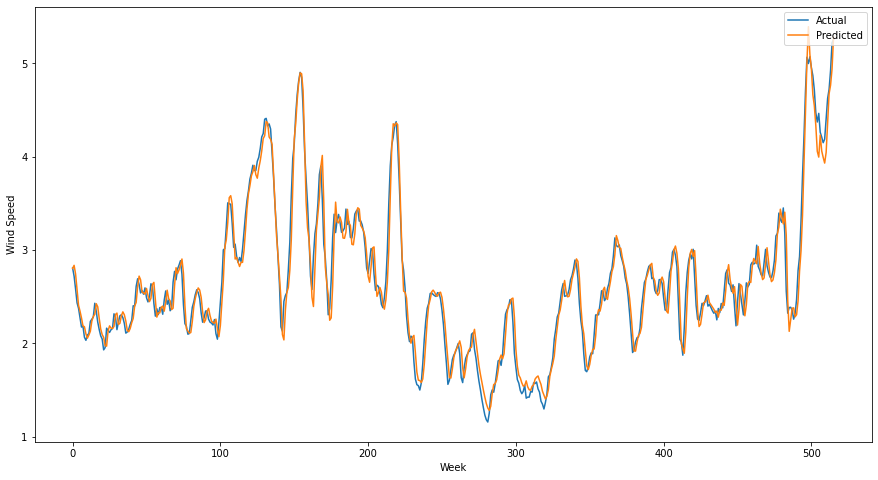

In [ ]:
# x axis values
x = list(range(516))
plt.figure(figsize=(15, 8))
plt.plot(x, y,label='Actual')

plt.xlabel('Week')
plt.ylabel('Wind Speed')

plt.plot(x,yhat,label='Predicted')
plt.legend(loc="upper right")
from matplotlib.pyplot import figure


plt.show()

In [ ]:
X, y = split_sequence(df_rj1_test, n_steps)

In [ ]:
get_metrics(X,y)

MSE=  [[0.02575687]]
MAPE=  [[0.12565129]]
MAPE=  [[0.05202759]]


In [ ]:
print(X[1],y[1])
print(model.predict(X[1].reshape((1, n_steps, n_features)),verbose=0))

[[5.17436606]
 [4.82479862]
 [4.59070823]
 [4.40091826]] [4.06383822]
[[3.9019046]]


In [ ]:
import matplotlib.pyplot as plt

For Rajasthan4

In [ ]:
df=pd.read_csv('Rajasthan4.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,Wind Speed
0,2.031432
1,2.330494
2,2.095144
3,2.331069
4,3.469066
...,...
5470,3.672130
5471,3.239627
5472,2.964070
5473,2.876066


In [ ]:
df_rj1=pd.DataFrame(columns=['Wind Speed'])

In [ ]:
for i in range(int(len(df)/7)):
  sum=0.0
  for j in range(7):
    if j>int(len(df)):
      break
    sum+=df['Wind Speed'].iloc[i+j]
  sum=sum/7
  df_rj1=df_rj1.append({'Wind Speed': sum}, ignore_index=True)

In [ ]:
df_rj1

,Wind Speed
0,2.783947
1,2.921720
2,2.983031
3,3.142834
4,3.156986
...,...
777,2.354000
778,2.591902
779,2.695127
780,2.878345


In [ ]:
df_rj1_train=df_rj1[0:520]
df_rj1_test=df_rj1[520:]

In [ ]:
X, y = split_sequence(df_rj1_train, n_steps)

In [ ]:
X.shape

(516, 4, 1)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 3s 6ms/step - loss: 6.8878
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 3.5514
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6840
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3978
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3142
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2675
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2096
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1954
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1799
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1699
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1633
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1576
Epoch 13/100
17/17 [=================

In [ ]:
def get_metrics(X,y):
  size=X.shape[0]
  mse=0.0
  mae=0.0
  mape=0.0
  for i in range(size):
    yhat = model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0)
    mse+=(yhat-y[i])*(yhat-y[i])
    mae+=abs((yhat-y[i]))
    mape+=abs((y[i]-yhat)/y[i])
  
  mse=mse/size
  mae=mae/size
  mape=mape/size
  print("MSE= ",mse)
  print("MAPE= ",mae)
  print("MAPE= ",mape)

In [ ]:
get_metrics(X,y)

MSE=  [[0.03544873]]
MAPE=  [[0.14809302]]
MAPE=  [[0.05789859]]


In [ ]:
print(len(x))
print(y.shape)

516
(516, 1)


In [ ]:
size=X.shape[0]
yhat=np.zeros(size)
for i in range(size):
  yhat[i]=(model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0))

In [ ]:
print(yhat[0].shape)

()


In [ ]:
yhat.shape

(516,)

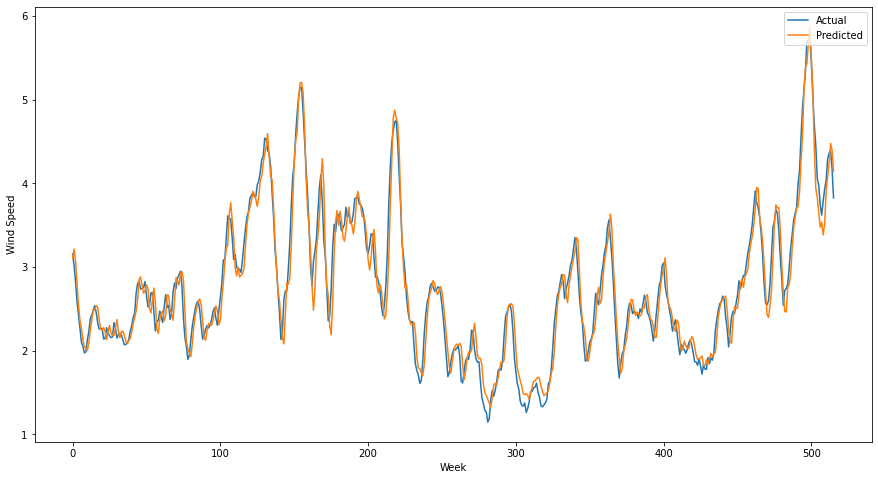

In [ ]:
# x axis values
x = list(range(516))
plt.figure(figsize=(15, 8))
plt.plot(x, y,label='Actual')

plt.xlabel('Week')
plt.ylabel('Wind Speed')

plt.plot(x,yhat,label='Predicted')
plt.legend(loc="upper right")
from matplotlib.pyplot import figure


plt.show()

In [ ]:
X, y = split_sequence(df_rj1_test, n_steps)

In [ ]:
get_metrics(X,y)

MSE=  [[0.04210686]]
MAPE=  [[0.15980494]]
MAPE=  [[0.05725265]]


In [ ]:
print(X[1],y[1])
print(model.predict(X[1].reshape((1, n_steps, n_features)),verbose=0))

[[3.20824577]
 [2.7320162 ]
 [2.3543394 ]
 [2.16630666]] [2.15042238]
[[2.058191]]


In [ ]:
import matplotlib.pyplot as plt

For Rajasthan5

In [ ]:
df=pd.read_csv('Rajasthan5.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,Wind Speed
0,3.297849
1,3.509373
2,2.420728
3,2.562473
4,3.345174
...,...
5105,1.331392
5106,1.370222
5107,1.627515
5108,2.886212


In [ ]:
df_rj1=pd.DataFrame(columns=['Wind Speed'])

In [ ]:
for i in range(int(len(df)/7)):
  sum=0.0
  for j in range(7):
    if j>int(len(df)):
      break
    sum+=df['Wind Speed'].iloc[i+j]
  sum=sum/7
  df_rj1=df_rj1.append({'Wind Speed': sum}, ignore_index=True)

In [ ]:
df_rj1

,Wind Speed
0,3.034748
1,2.925654
2,2.808413
3,2.810027
4,2.628054
...,...
725,2.373680
726,2.177523
727,2.063401
728,2.103298


In [ ]:
df_rj1_train=df_rj1[0:520]
df_rj1_test=df_rj1[520:]

In [ ]:
X, y = split_sequence(df_rj1_train, n_steps)

In [ ]:
X.shape

(516, 4, 1)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 7ms/step - loss: 7.4809
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 3.4242
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 1.3074
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7139
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4934
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.3480
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2640
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2173
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1769
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1501
Epoch 11/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1430
Epoch 12/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1420
Epoch 13/100
17/17 [=================

In [ ]:
def get_metrics(X,y):
  size=X.shape[0]
  mse=0.0
  mae=0.0
  mape=0.0
  for i in range(size):
    yhat = model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0)
    mse+=(yhat-y[i])*(yhat-y[i])
    mae+=abs((yhat-y[i]))
    mape+=abs((y[i]-yhat)/y[i])
  
  mse=mse/size
  mae=mae/size
  mape=mape/size
  print("MSE= ",mse)
  print("MAPE= ",mae)
  print("MAPE= ",mape)

In [ ]:
get_metrics(X,y)

MSE=  [[0.03847073]]
MAPE=  [[0.15856412]]
MAPE=  [[0.06158661]]


In [ ]:
print(len(x))
print(y.shape)

516
(516, 1)


In [ ]:
size=X.shape[0]
yhat=np.zeros(size)
for i in range(size):
  yhat[i]=(model.predict(X[i].reshape((1, n_steps, n_features)),verbose=0))

In [ ]:
print(yhat[0].shape)

()


In [ ]:
yhat.shape

(516,)

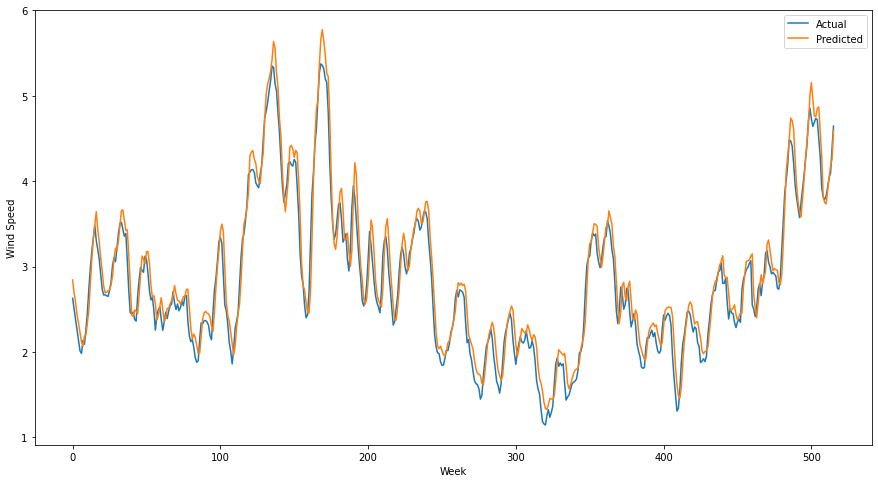

In [ ]:
# x axis values
x = list(range(516))
plt.figure(figsize=(15, 8))
plt.plot(x, y,label='Actual')

plt.xlabel('Week')
plt.ylabel('Wind Speed')

plt.plot(x,yhat,label='Predicted')
plt.legend(loc="upper right")
from matplotlib.pyplot import figure


plt.show()

In [ ]:
X, y = split_sequence(df_rj1_test, n_steps)

In [ ]:
get_metrics(X,y)

MSE=  [[0.05317394]]
MAPE=  [[0.17790904]]
MAPE=  [[0.07402492]]


In [ ]:
print(X[1],y[1])
print(model.predict(X[1].reshape((1, n_steps, n_features)),verbose=0))

[[4.87376624]
 [4.84847486]
 [4.89891203]
 [5.03554514]] [5.30859604]
[[5.2148247]]


In [ ]:
import matplotlib.pyplot as plt

For Rajasthan3